In [32]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
from dash import Dash
from dash import html, dcc
from dash import callback, Output, Input
import plotly
import plotly.express as px
import plotly.io as pio
from urllib.request import urlopen

# DATA SELECTION AND SET UP

### Loading the data

In [100]:
# Setting the path to GitHub
path = Path(os.getcwd())
base_dir = path.parent.parent
path_in = "https://github.com/amer1606/Data_Visualization2/"

In [ ]:
goals = pd.read_csv("goals.csv")
isoc = pd.read_csv("countries_iso.csv")
matches = pd.read_csv("matches.csv")

### Creating iso_alpha tables

In [35]:
isoc.columns = ['country_name',  'full_name', '2L', 'iso_alpha', 'long', 'lat', 'unknown']
isoc.drop(columns=['full_name', '2L', 'long', 'lat', 'unknown'], inplace = True)
isoc

,country_name,iso_alpha
0,Åland Islands,ALA
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
244,Wallis and Futuna,WLF
245,Western Sahara,ESH
246,Yemen,YEM
247,Zambia,ZMB


In [36]:
isoc.rename(columns={'country_name':'player_team_name'}, inplace = True)
# Define the condition1 to select rows
condition1 = isoc['player_team_name'].isin(['United States of America'])
# Change values in the 'column_name' for selected rows
isoc.loc[condition1, 'player_team_name'] = 'United States'
# Define the condition 2 to select rows
condition2 = isoc['player_team_name'].isin(['Iran (Islamic Republic of)'])
# Change values in the 'column_name' for selected rows
isoc.loc[condition2, 'player_team_name'] = 'Iran'
# Define the condition 3 to select rows
condition3 = isoc['player_team_name'].isin(['Bolivia (Plurinational State of)'])
# Change values in the 'column_name' for selected rows
isoc.loc[condition3, 'player_team_name'] = 'Bolivia'

### Setting the data table for graph purposes

In [37]:
# Creating year slider data
year_slider = matches['year'].unique()
year_slider

array([1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978,
       1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018],
      dtype=int64)

In [38]:
# Creating country selector data from participating countries since 1930
country_list = set(matches['home_team_name']).union(matches['away_team_name'])
country_list

{'Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 'Denmark',
 'Dutch East Indies',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'France',
 'Germany',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'Iran',
 'Iraq',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Kuwait',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'North Korea',
 'Northern Ireland',
 'Norway',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Republic of Ireland',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Serbia and Montenegro',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 

In [39]:
# Setting year default values for testing pruposes
min_year = 1930
max_year = 2018
year = max(min_year, max_year)

### For Card 1: Winner

In [40]:
# Identifying the Winner for the last year of the selection (by deafult 2018)

# year = competition year
check_condition = (matches['year'] == year) & (matches['stage_name'] == 'final') & (matches['result'] == 'home team win')

if check_condition.any():
    winner = matches.loc[check_condition, 'home_team_name'].values[0]
else:
    winner = matches.loc[check_condition, 'away_team_name'].values[0]

winner

'France'

### For Card 2: Runner Up

In [41]:
# Identifying the Runner Up for the last year of the selection (by deafult 2018)

# year = competition year
check_condition = (matches['year'] == year) & (matches['stage_name'] == 'final') & (matches['result'] == 'home team win')

if check_condition.any():
    second = matches.loc[check_condition, 'away_team_name'].values[0]
else:
    second = matches.loc[check_condition, 'home_team_name'].values[0]

second

'Croatia'

### For Card 3: Winner of Third Place match

In [42]:
# Identifying the third team for the last year of the selection (by deafult 2018)

# year = competition year
check_condition = (matches['year'] == year) & (matches['stage_name'] == 'third-place match') & (matches['result'] == 'home team win')

if check_condition.any():
    third = matches.loc[check_condition, 'home_team_name'].values[0]
else:
    third = matches.loc[check_condition, 'away_team_name'].values[0]

third

'Belgium'

### Setting "GOAL" table for graph purposes

In [43]:
# Table of Goals from 1930 to 2018
goals = pd.merge(goals, isoc, on = 'player_team_name', how = 'left')
goals.head()

,key_id,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,...,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty,year,iso_alpha
0,1,G-0001,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,France,FRA,19',19,0,first half,0,0,1930,FRA
1,2,G-0002,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,France,FRA,40',40,0,first half,0,0,1930,FRA
2,3,G-0003,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,France,FRA,43',43,0,first half,0,0,1930,FRA
3,4,G-0004,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,France,FRA,87',87,0,second half,0,0,1930,FRA
4,5,G-0005,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-44,...,Mexico,MEX,70',70,0,second half,0,0,1930,MEX


In [44]:
# Goals

year_condition = (goals['year'] >= min_year) & (goals['year'] <= max_year)

# Selecting the 10 top scoring teams of the period
goals_rank_tot = pd.DataFrame(goals.loc[year_condition, 'player_team_name'].value_counts())
goals_rank = pd.DataFrame(goals.loc[year_condition, 'player_team_name'].value_counts().head(10))
goals_rank.rename(columns = {'player_team_name':'Teams'}, inplace = True)
goals_rank.reset_index(drop = False, inplace = True)
goals_rank_tot = pd.merge(goals_rank_tot, goals[['player_team_name','iso_alpha']], on = 'player_team_name', how ='left')
goals_rank_total = goals_rank_tot.drop_duplicates(subset='player_team_name', keep='first')
goals_rank_total

,player_team_name,count,iso_alpha
0,Brazil,230,BRA
230,Germany,227,DEU
457,Argentina,136,ARG
593,Italy,125,ITA
718,France,114,FRA
...,...,...,...
2543,Togo,1,TGO
2544,Bolivia,1,BOL
2545,Iraq,1,IRQ
2546,Israel,1,ISR


### Setting "GOAL SCORER" table for graph purposes

In [45]:
# Goals Scorers

year_condition = (goals['year'] >= min_year) & (goals['year'] <= max_year)

# Building player name
goals.loc[goals['given_name'] == 'not applicable', 'given_name'] = ''
goals['Player'] = goals['given_name'].str.cat(goals['family_name'], sep = ' ')

# Selecting the 10 top scoring players of the period
goals_scorer = pd.DataFrame(goals.loc[year_condition, 'Player'].value_counts().head(15))
goals_scorer.reset_index(inplace = True)


# Merging with 'player_team_name' column from the 'goals' DataFrame
goals_scorer = pd.merge(goals_scorer, goals[['Player', 'player_team_name']], on = 'Player', how ='left')
goals_scorer.columns = ['Player', 'Count', 'Team']

# Remove duplicates and keep only one row for each player
goals_scorer = goals_scorer.drop_duplicates(subset='Player', keep='first')
goals_scorer

,Player,Count,Team
0,Miroslav Klose,16,Germany
16,Ronaldo,15,Brazil
31,Gerd Müller,14,Germany
45,Just Fontaine,13,France
58,Pelé,12,Brazil
70,Sándor Kocsis,11,Hungary
81,Jürgen Klinsmann,11,Germany
92,Gabriel Batistuta,10,Argentina
102,Grzegorz Lato,10,Poland
112,Teófilo Cubillas,10,Peru


### Setting "WINNERS" table for graph purposes

In [46]:
#  Winners table selection
final_games = matches[matches['stage_name'] == 'final']

In [47]:
# Create a column 'Winners' based on the 'result' column
final_games.loc[:, 'Winners'] = np.where(final_games['result'] == 'home team win', final_games['home_team_name'], final_games['away_team_name'])
winner_rank = final_games['Winners'].value_counts()
winner_ranking = pd.DataFrame(winner_rank).reset_index()
# creating iso_alpha variable
dictiso = {'Brazil': 'BRA', 'Italy': 'ITA', 'Germany': 'DEU', 'Argentina': 'ARG', 'France': 'FRA', 'Uruguay': 'URY', 'England': 'GB-ENG', 'Spain': 'ESP'}
isoa = pd.DataFrame(list(dictiso.items()), columns=['Winners', 'iso_alpha']).reset_index()
isoa

# Merging DataFrames
winner_iso = pd.merge(winner_ranking, isoa, on='Winners', how='left')
winner_iso


C:\Users\ceder\AppData\Local\Temp\ipykernel_20488\1197633844.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Winners,count,index,iso_alpha
0,Brazil,5,0,BRA
1,Italy,4,1,ITA
2,Germany,4,2,DEU
3,Argentina,2,3,ARG
4,France,2,4,FRA
5,Uruguay,1,5,URY
6,England,1,6,GB-ENG
7,Spain,1,7,ESP


# CREATING GRAPHS

### Brackets

- min_year = input('Starting year?')
- max_year = input('Finishing year?')
- year = input('Year of interest?')
- team = input('Team of interest?)

In [48]:
# Default values
pio.templates.default = 'plotly_white'


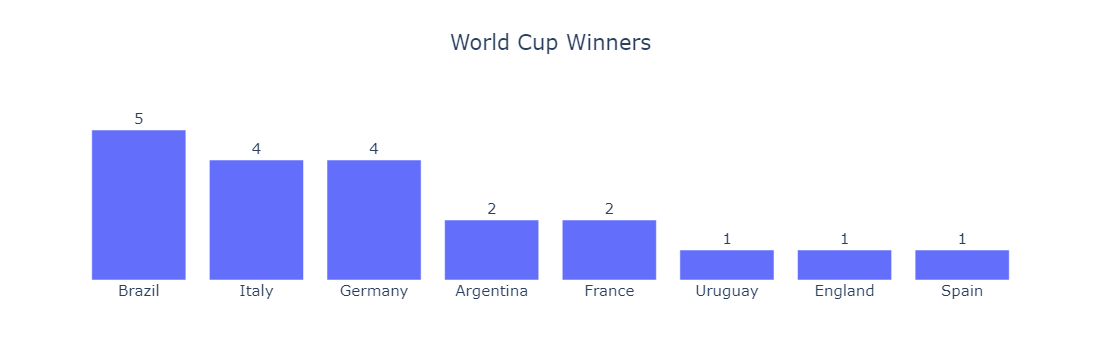

In [49]:
# Winners  Histogram
i = max(winner_ranking['count']) + 1
winners_bar = px.bar(winner_ranking, x ='Winners', y = 'count',
                     title = "World Cup Winners",
                     text_auto = True)
winners_bar.update_yaxes(visible = False)
winners_bar.update_layout(xaxis_title ='')
winners_bar.update_layout(yaxis = dict(range = [0,i]))
winners_bar.update_layout(title_x = 0.5, font_size = 15)
winners_bar.update_traces(texttemplate = '%{value:.0f}', textposition = 'outside')



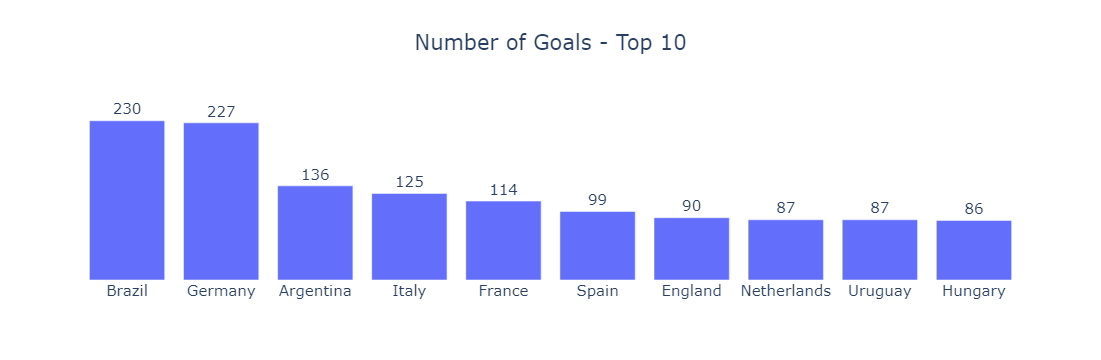

In [50]:
# Goals  Histogram
i = max(goals_rank['count']) + 30
goals_bar = px.bar(goals_rank, x ='player_team_name', y = 'count',
                   title = "Number of Goals - Top 10",
                   text_auto = True)
goals_bar.update_yaxes(visible = False)
goals_bar.update_layout(xaxis_title='')
goals_bar.update_layout(yaxis = dict(range = [0,i]))
goals_bar.update_layout(title_x = 0.5, font_size = 15)
goals_bar.update_traces(texttemplate = '%{value:.0f}', textposition = 'outside')


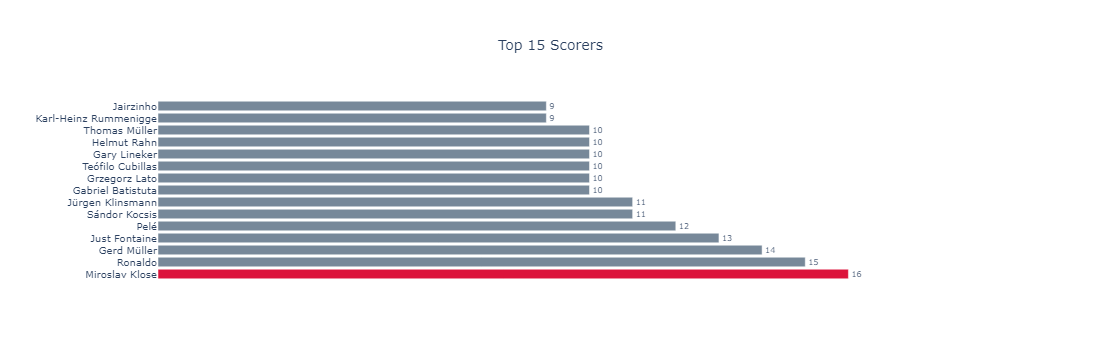

In [51]:
# Goals  Histogram 

j = max(goals_scorer['Count']) + 4
max_scorer = goals_scorer['Count'].idxmax()
goals_hist = px.bar(goals_scorer, y ='Player', x = 'Count',
               orientation='h',
               title = "Top 15 Scorers",
               text_auto = True)
goals_hist.update_xaxes(visible = False)
goals_hist.update_layout(yaxis_title='')
goals_hist.update_layout(yaxis_title='')
goals_hist.update_layout(xaxis = dict(range = [0,j]))
goals_hist.update_layout(title_x = 0.5, font_size = 10)
goals_hist.update_traces(texttemplate = '%{value:.0f}',
                         textposition = 'outside',
                         marker_color=['lightslategray' if i != max_scorer else 'crimson' for i in range(len(goals_scorer))])

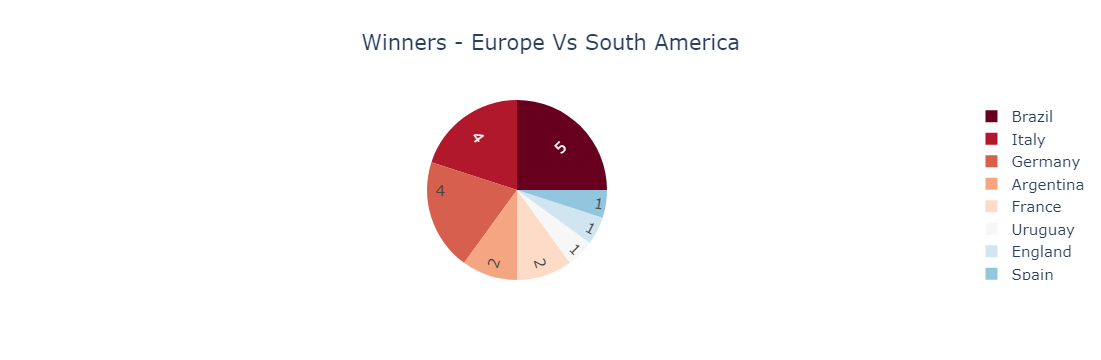

In [52]:
# Winners Pie
winners_pie = px.pie(winner_iso, values = 'count', names = 'Winners',
               title = "Winners - Europe Vs South America",
               color_discrete_sequence=px.colors.sequential.RdBu)
winners_pie.update_layout(title_x = 0.5, font_size = 15)
winners_pie.update_traces(texttemplate = '%{value:.0f}', textposition = 'outside', insidetextorientation='radial')
winners_pie.update_traces(textposition='inside', textinfo='value+label')

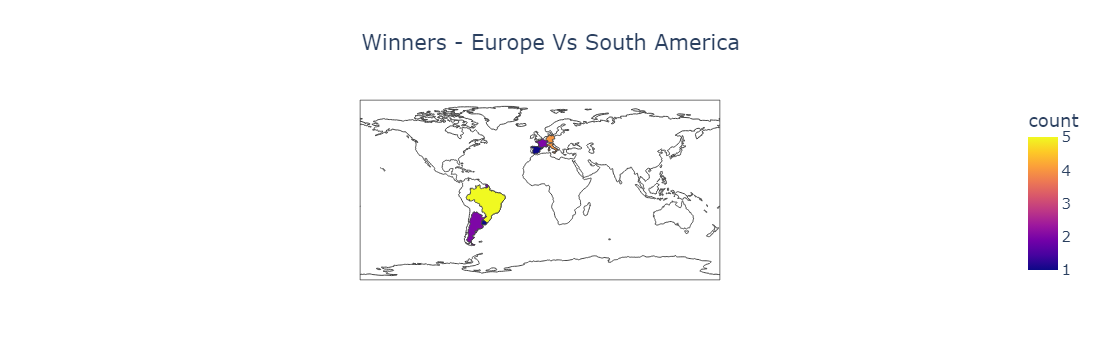

In [53]:
# Winners map
map1 = px.choropleth(winner_iso, locations="iso_alpha",
                     color="count",
                     title = "Winners - Europe Vs South America",
                     hover_name="Winners",
                     color_continuous_scale=px.colors.sequential.Plasma)
map1.update_layout(title_x = 0.5, font_size = 15)
map1.show()

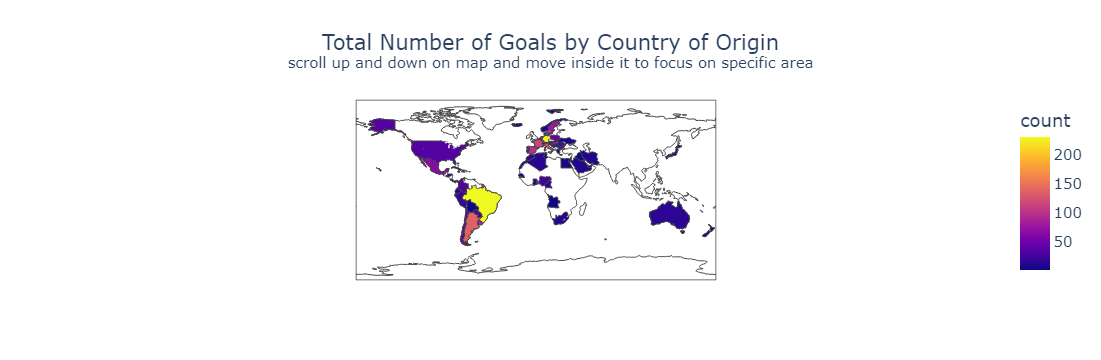

In [54]:
# Goals map
map2 = px.choropleth(goals_rank_total, locations="iso_alpha",
                    color="count",
                    title = "Total Number of Goals by Country of Origin<br><sup>scroll up and down on map and move inside it to focus on specific area</sup>",
                    hover_name="player_team_name",
                    color_continuous_scale=px.colors.sequential.Plasma)
map2.update_layout(title_x = 0.5, font_size = 15)
map2.show()

# DASH

In [55]:
# Create Dash App
app = Dash(__name__)

# Define Layout
app.layout = html.Div([
    html.H1("Football World Cup Dashboard", style={'textAlign':'center'}),
    html.Div([
        html.Label("Select Year Range:"),
        dcc.RangeSlider(
            id ='input1',
            min = min_year,
            max = max_year,
            step = 4,
            marks = {year: {'label': str(year), 'style': {'transform': 'rotate(-45deg)', 'white-space': 'nowrap'}} for year in range(1930, 2019)},
            value = [min_year, max_year]
       ),
    ]),
    html.Div([
        html.H3("Last Year Winners"),
        html.Div(id ='last-year-winner')
    ]),
    html.Div([
        html.H3("Winners"),
        dcc.Graph(id = 'graph1', figure = 'winners_bar', style = {'display': 'inline-block', 'width': '50%'}),
        dcc.Graph(id = 'graph2', figure = 'map1', style = {'display': 'inline-block', 'width': '50%'})
    ]),
    html.Div([
        html.H3("Goals"),
        dcc.Graph(id = 'graph3', figure = 'goals_hist', style = {'display': 'inline-block', 'width': '50%'}),
        dcc.Graph(id = 'graph4', figure = 'map2', style = {'display': 'inline-block', 'width': '50%'})
    ])
])


In [56]:
# Define Callbacks
@app.callback(
    Output('graph1', 'figure'),
    Output('graph2', 'figure'),
    Output('graph3', 'figure'),
    Output('graph4', 'figure'),
    Input('input1', 'value'),
)

def update(_input1):
    winners_bar = px.bar(winner_ranking, x ='Winners', y = 'count',
                         title = "World Cup Winners",
                         text_auto = True)

    goals_bar = px.bar(goals_rank, x ='player_team_name', y = 'count',
                       title = "Number of Goals - Top 10",
                       text_auto = True)

    map1 = px.choropleth(winner_iso, color = "count", title = "Winners - Europe Vs South America",
                         hover_name = "Winners", color_continuous_scale=px.colors.sequential.Plasma)

    map2 = px.choropleth(goals_rank_total, locations = "iso_alpha",
                    color="count",
                    title = "Total Number of Goals by Country of Origin<br><sup>scroll up and down on map and move inside it to focus on specific area</sup>",
                    hover_name="player_team_name",
                    color_continuous_scale=px.colors.sequential.Plasma)

    return winners_bar, goals_bar, map1, map2

app.run(port=8058)

In [25]:
def update_last_year_winner(selected_year):
    # Add code to retrieve last year winner based on the selected year
    return f"Last Year Winner: {winner}"

In [26]:
def update_goals_bar(selected_year, selected_countries):
    # Add code to generate goals bar chart based on the selected year and countries
    # Use the 'figure' property of the dcc.Graph component


SyntaxError: incomplete input (559259085.py, line 3)

In [27]:
@app.callback(
    Output('winners-pie', 'figure'),
    [Input('year-slider', 'value')]

SyntaxError: incomplete input (1289371217.py, line 3)

In [28]:
def update_winners_pie(selected_year):
    # Add code to generate winners pie chart based on the selected year
    # Use the 'figure' property of the dcc.Graph component

SyntaxError: incomplete input (4276834725.py, line 3)

In [29]:
# Run the app
if __name__ == '__main__':
    app.run(port=8054)

OSError: Address 'http://127.0.0.1:8054' already in use.
    Try passing a different port to run_server.